In [192]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [193]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

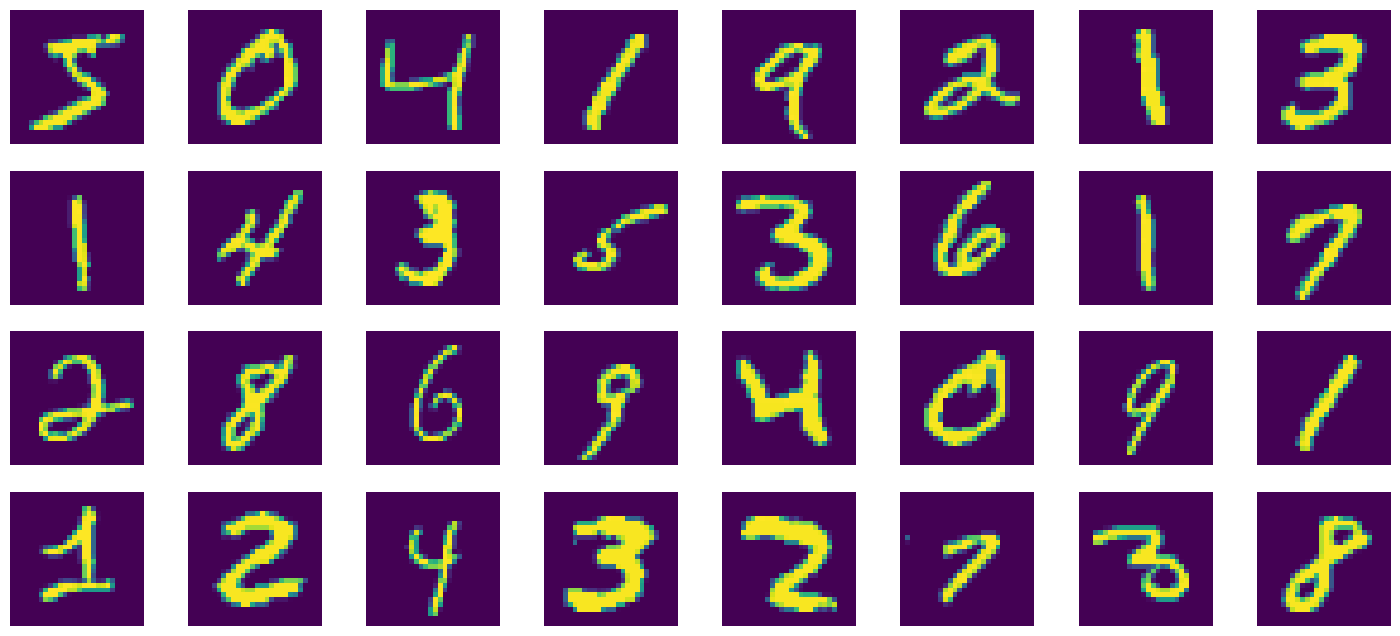

In [194]:
# Sample dataset
plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_train[i, :, :])
    plt.axis("off")

In [195]:
x_train[0].shape

(28, 28)

In [196]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(28, activation='relu'),
    Dropout(0.2),
    Dense(14, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [197]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [198]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=128)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.7677 - accuracy: 0.7536 - val_loss: 0.2868 - val_accuracy: 0.9241
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.5037 - accuracy: 0.8528 - val_loss: 0.2766 - val_accuracy: 0.9254
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4608 - accuracy: 0.8665 - val_loss: 0.2502 - val_accuracy: 0.9343
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4388 - accuracy: 0.8710 - val_loss: 0.2490 - val_accuracy: 0.9351
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4300 - accuracy: 0.8741 - val_loss: 0.2598 - val_accuracy: 0.9365
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8802 - val_loss: 0.2366 - val_accuracy: 0.9391
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4046 - accuracy: 0.8841 - val_loss: 0.2469 - val_accuracy: 0.9402
Epoch 

In [199]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2419 - accuracy: 0.9397 - 610ms/epoch - 2ms/step


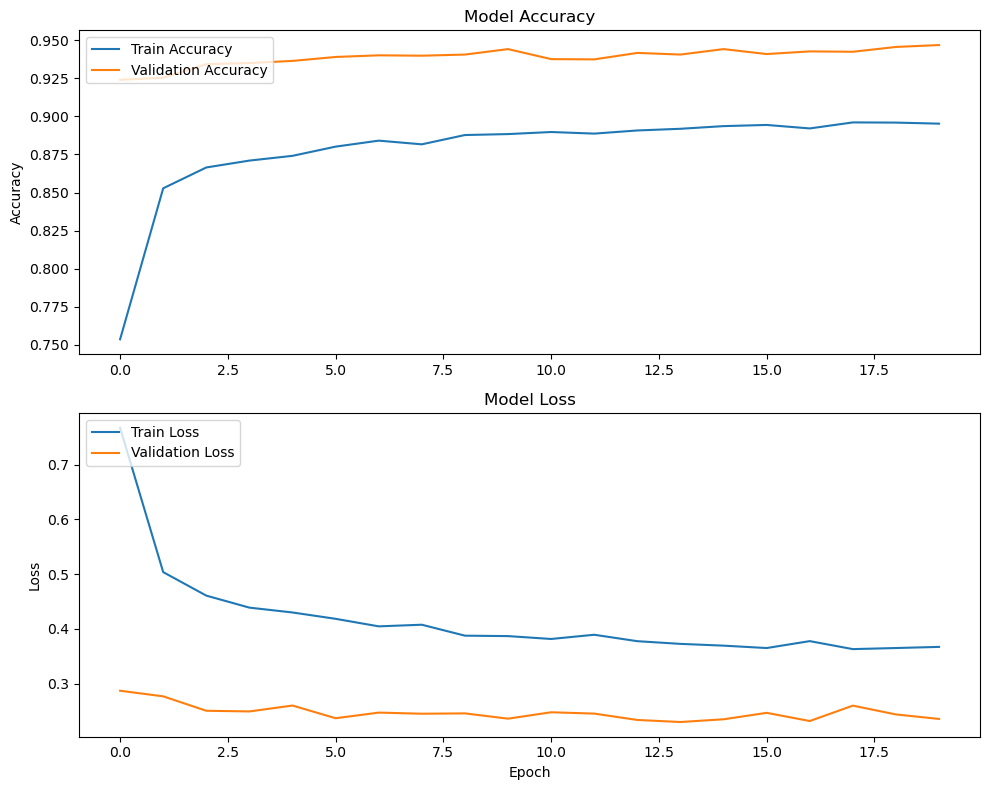

In [200]:
# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

In [201]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


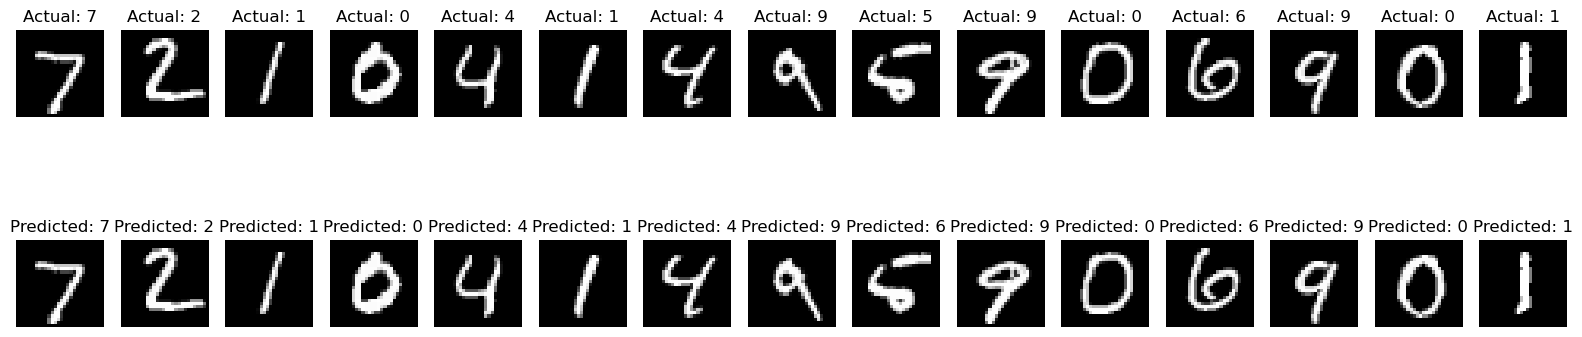

Test loss: 0.2418830543756485
Test accuracy: 0.9397000074386597


In [202]:
# Plot predicted vs actual
num_images = 15 # Number of images to display
fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

for i in range(num_images):
    # Show the actual image
    axs[0, i].imshow(x_test[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Actual: {y_test[i]}")
    
    # Show the predicted image
    axs[1, i].imshow(x_test[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Predicted: {np.argmax(predictions[i])}")

plt.show()

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

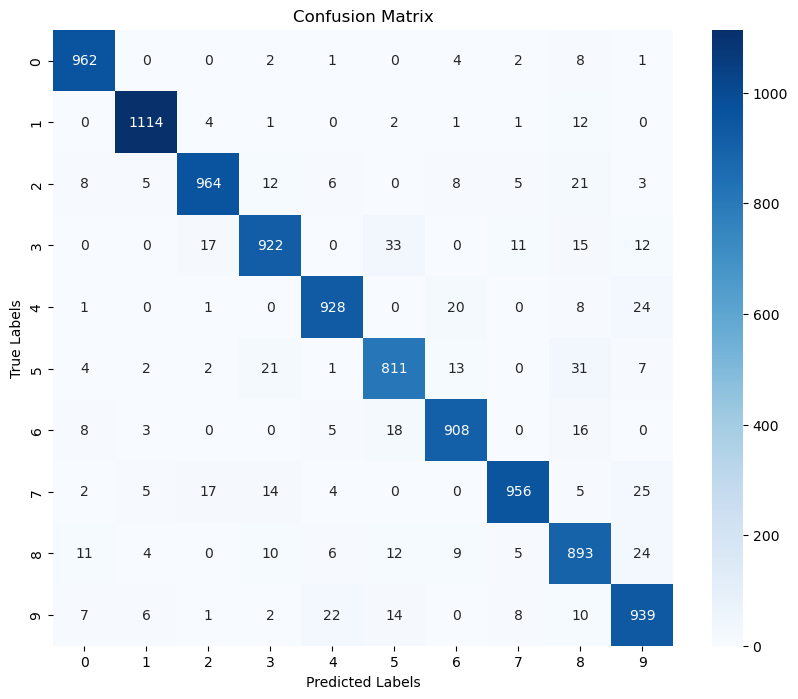

In [203]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()